<a href="https://colab.research.google.com/github/BENMEZIAN/Matplotlib-tutorial/blob/main/Part_05_Scatter_plot_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

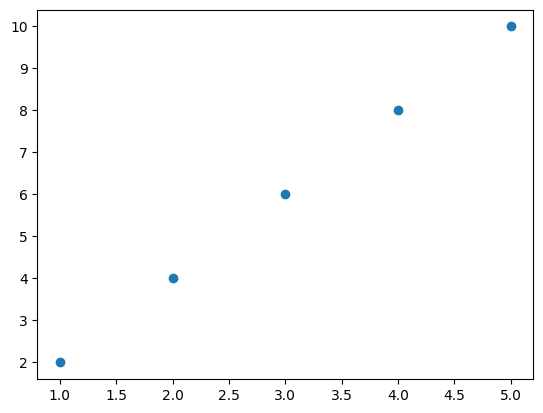

In [3]:
import matplotlib.pyplot as plt

# draw a scatter plot
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
plt.scatter(x, y)
plt.show()

# Scatter plot for dataset

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
(22, 5)
     Open    High     Low   Close    Volume
0  153.17  153.33  152.22  153.18  16404088
1  153.58  155.45  152.89  155.45  27770715
2  154.34  154.45  153.46  153.93  25331662
3  153.90  155.81  153.78  154.45  26624926
4  155.02  155.98  154.48  155.37  21069647


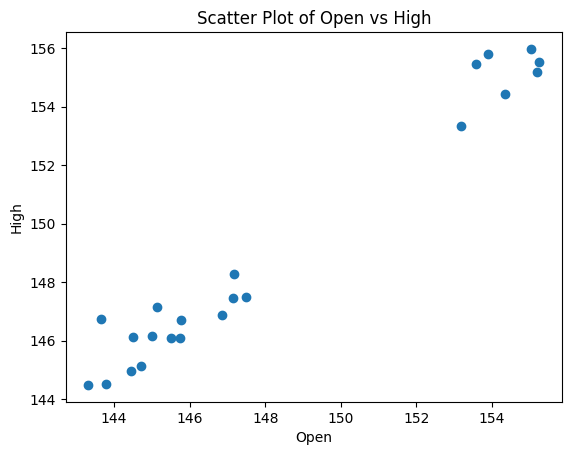

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('aapl_no_dates.csv')

print(df.columns)
print(df.shape)
print(df.head())

# Scatter plot
plt.scatter(df['Open'], df['High'])
plt.xlabel('Open')
plt.ylabel('High')
plt.title('Scatter Plot of Open vs High')
plt.show()

# Multiple scatter plots at one figure

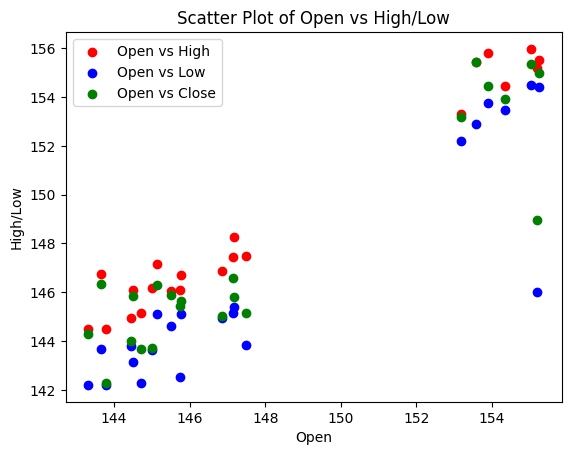

In [40]:
# multiple scatter plots at the same figure with choosen colors
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('aapl_no_dates.csv')

plt.scatter(df['Open'], df['High'], color='red', label='Open vs High')
plt.scatter(df['Open'], df['Low'], color='blue', label='Open vs Low')
plt.scatter(df['Open'], df['Close'], color='green', label='Open vs Close')
plt.xlabel('Open')
plt.ylabel('High/Low')

plt.title('Scatter Plot of Open vs High/Low')
plt.legend()
plt.show()

# Weight vs Height

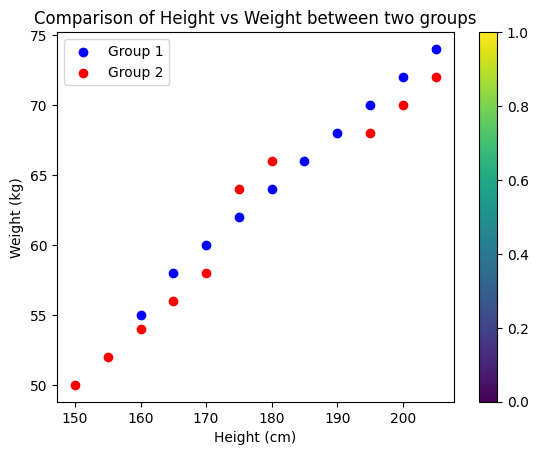

In [42]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.array([160, 165, 170, 175, 180, 185, 190, 195, 200, 205])
y1 = np.array([55, 58, 60, 62, 64, 66, 68, 70, 72, 74])

x2 = np.array([150, 155, 160, 165, 170, 175, 180, 195, 200, 205])
y2 = np.array([50, 52, 54, 56, 58, 64, 66, 68, 70, 72])

plt.scatter(x1, y1, color='blue', label='Group 1')
plt.scatter(x2, y2, color='red', label='Group 2')

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Comparison of Height vs Weight between two groups')

plt.colorbar()
plt.legend()
plt.show()

# Customization of bubble size

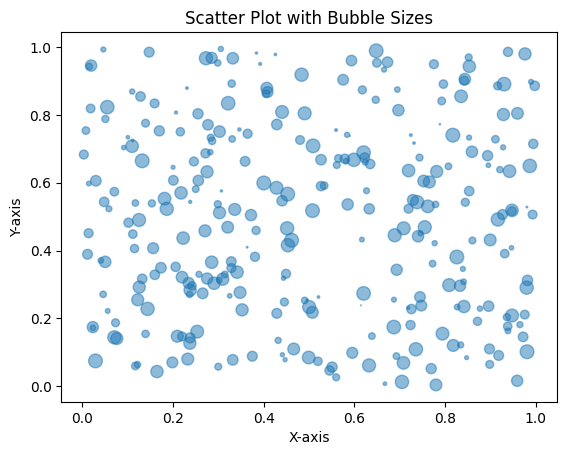

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.random.rand(300)
y = np.random.rand(300)
sizes = np.random.rand(300) * 100  # Bubble sizes

# Create the scatter plot with bubble sizes
plt.scatter(x, y, s=sizes, alpha=0.5)  # s represents the size of bubbles, alpha controls transparency

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Bubble Sizes')
plt.show()

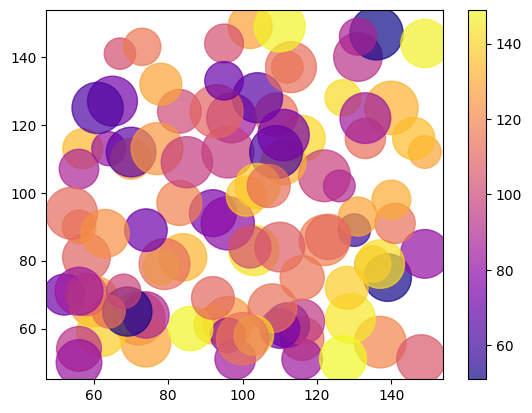

In [49]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randint(50, 150, size=(100))
y = np.random.randint(50, 150, size=(100))
colors = np.random.randint(50, 150, size=(100))
sizes = 10 * np.random.randint(50, 150, size=(100))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.7, cmap='plasma')

plt.colorbar()
plt.show()


# Kmeans

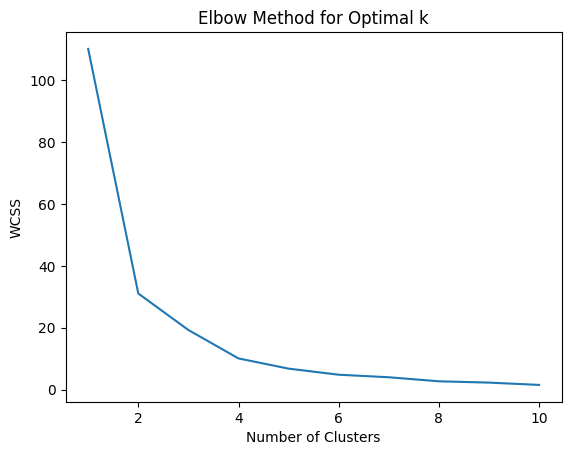

Silhouette Score: 0.6794673626134534


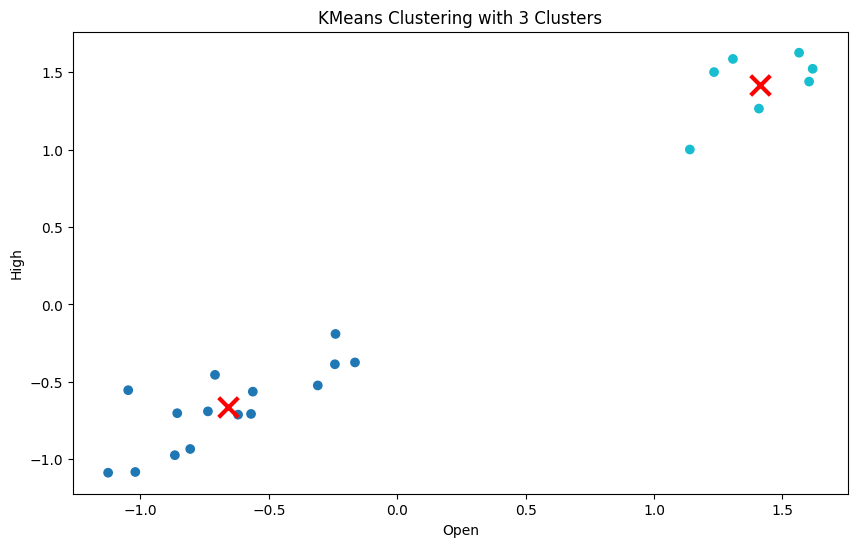

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('aapl_no_dates.csv')

# Preprocessing: Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df.values)


# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):  # Trying 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Now choose an optimal 'k' (let's assume 3 for this example)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Compute the Silhouette Score
sil_score = silhouette_score(X, labels)

# Print the Silhouette Score
print(f"Silhouette Score: {sil_score}")

# Plot the clusters using a better colormap
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')  # Use a different colormap like 'tab10'
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('KMeans Clustering with 3 Clusters')
plt.xlabel('Open')  # Modify the label based on your dataset
plt.ylabel('High')  # Modify the label based on your dataset
plt.show()

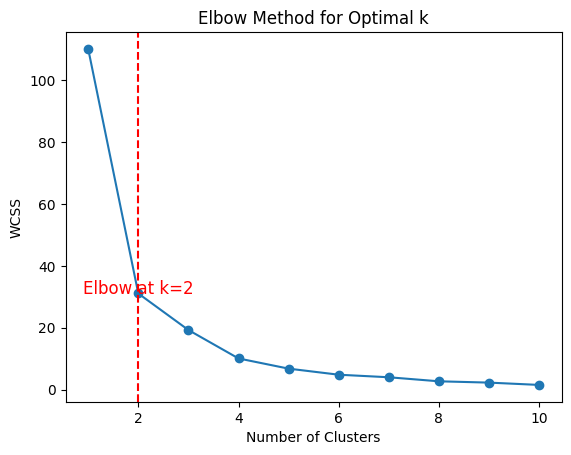

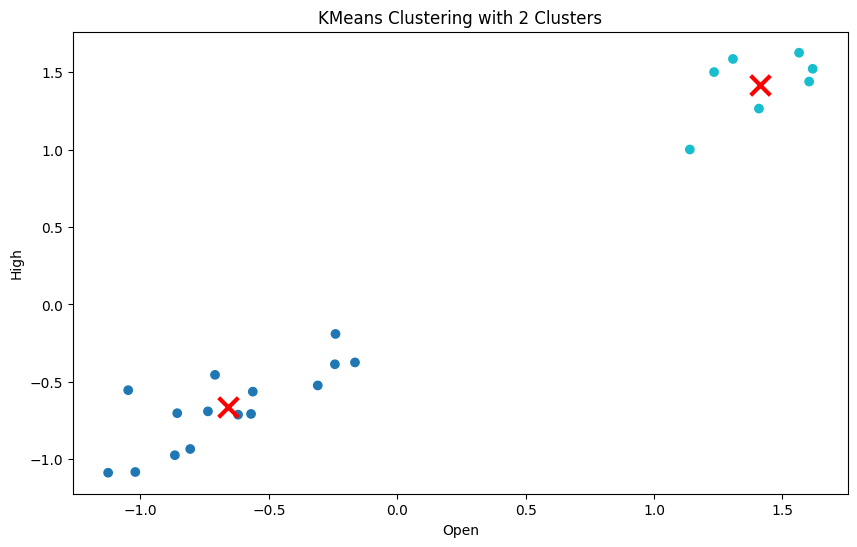

In [60]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from kneed import KneeLocator  # Import the KneeLocator from kneed

# Load the dataset
df = pd.read_csv('aapl_no_dates.csv')

# Preprocessing: Standardize the features (using all 5 features in this example)
scaler = StandardScaler()
X = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']].values)

# Elbow Method to find the optimal number of clusters
wcss = []  # List to store within-cluster sum of squares (WCSS)
for i in range(1, 11):  # Trying 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Use KneeLocator to find the elbow point
kneedle = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

# Plotting the elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=optimal_k, color='r', linestyle='--')  # Mark the optimal k with a red dashed line
plt.text(optimal_k, wcss[optimal_k - 1], f'Elbow at k={optimal_k}', color='red', fontsize=12, ha='center')
plt.show()

# Perform KMeans clustering with the optimal number of clusters (e.g., 3, as detected)
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters (using the first two features for visualization purposes)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')  # Use a different colormap like 'tab10'
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title(f'KMeans Clustering with {optimal_k} Clusters')
plt.xlabel('Open')
plt.ylabel('High')
plt.show()